### K Nearest Neighbors Implementation for Iris Classification

3 types of flowers, and four measures for each flower recorded (length, width, petal, sepal)


In [19]:
import pandas as pd
import numpy as np


In [16]:
iris_data = pd.read_csv('Iris.csv')
iris_data.head(10)
# print(iris_data)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [17]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns #more sophisticated visualization
%matplotlib inline

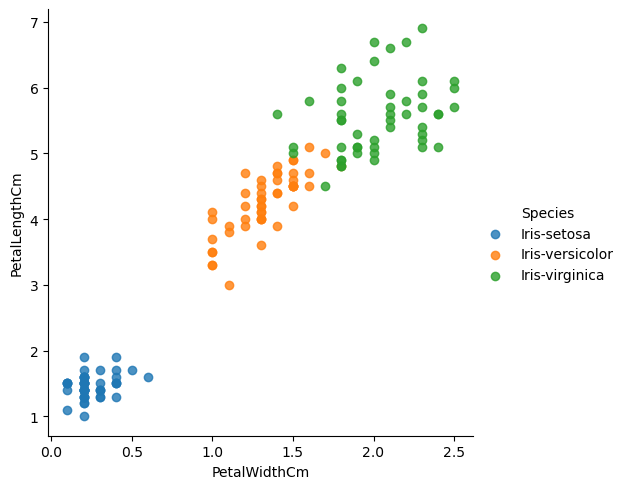

In [35]:
sns.lmplot(x='PetalWidthCm', y='PetalLengthCm', data=iris_data, hue='Species', fit_reg=False) #create a scatterplot of petal width and length

In [41]:
#turn the species into numbers, turn the categorical values into numerical values
from sklearn.preprocessing import OrdinalEncoder #sklearn used for ML
ord_enc = OrdinalEncoder()
iris_data["SpeciesCode"] = ord_enc.fit_transform(iris_data[['Species']] )  #add new col to iris_data
# iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SpeciesCode
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0.0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0.0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0.0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0.0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0.0


In [43]:
#get a dataset of just the four features (length and width of petal and sepal)
X=iris_data.drop(columns=["Species", "SpeciesCode"])
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [46]:
# create y dataset of just the species code ie. the label 
y=iris_data["SpeciesCode"]
# y.head()

In [52]:
# randomly split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1984)
# X_train.info()

In [77]:
from sklearn.neighbors import KNeighborsClassifier #doing classification and not regression
KNN = KNeighborsClassifier(n_neighbors=1) #pass in the number of neighbors

In [73]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=92)

In [74]:
import warnings
warnings.filterwarnings('ignore')

In [75]:
y_pred = KNN.predict(X_test) #has a warning pop up so add ignore warning filter
print(y_pred)

[2. 2. 2. 0. 0. 2. 2. 2. 0. 0. 0. 2. 2. 0. 0. 0. 2. 0. 2. 0. 0. 2. 2. 0.
 0. 2. 2. 2. 2. 0. 0. 2. 0. 0. 2. 0. 2. 0. 2. 2. 0. 0. 2. 0. 2. 2. 2. 0.
 0. 2.]


In [76]:
np.mean(y_pred==y_test) #does a brute force average correct, result is 1.0, so all are correct
                        #increasing the value of k will reduce the accuracy

0.52